In [2]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy joypy scikit-learn
sys.path.append('.')
import plotUtil


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


Plot a heatmap of the cell scores.

In [3]:
import json
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817612663.json'
#json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817614609.json'
# json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685973719958.json'
# json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_cell-scores_step-10000_thrshld_0.5_1686002319863.json'
json_file_path = '/Users/bjornpjo/QD-Fox/conf-duration_delta_pitch_combinations-singleCellWin/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_1693252236608.json'
# x_multiplier = 1000  # Set this value as the step size in the JSON file name
x_multiplier = 1000  # Set this value as the step size in the JSON file name
title = "cellScores: " + json_file_path.split('/')[4]

# Read data from JSON file
data = plotUtil.read_data_from_json(json_file_path)

cell_scores_arrays = plotUtil.extract_data_arrays(data, 'cellScores', True)

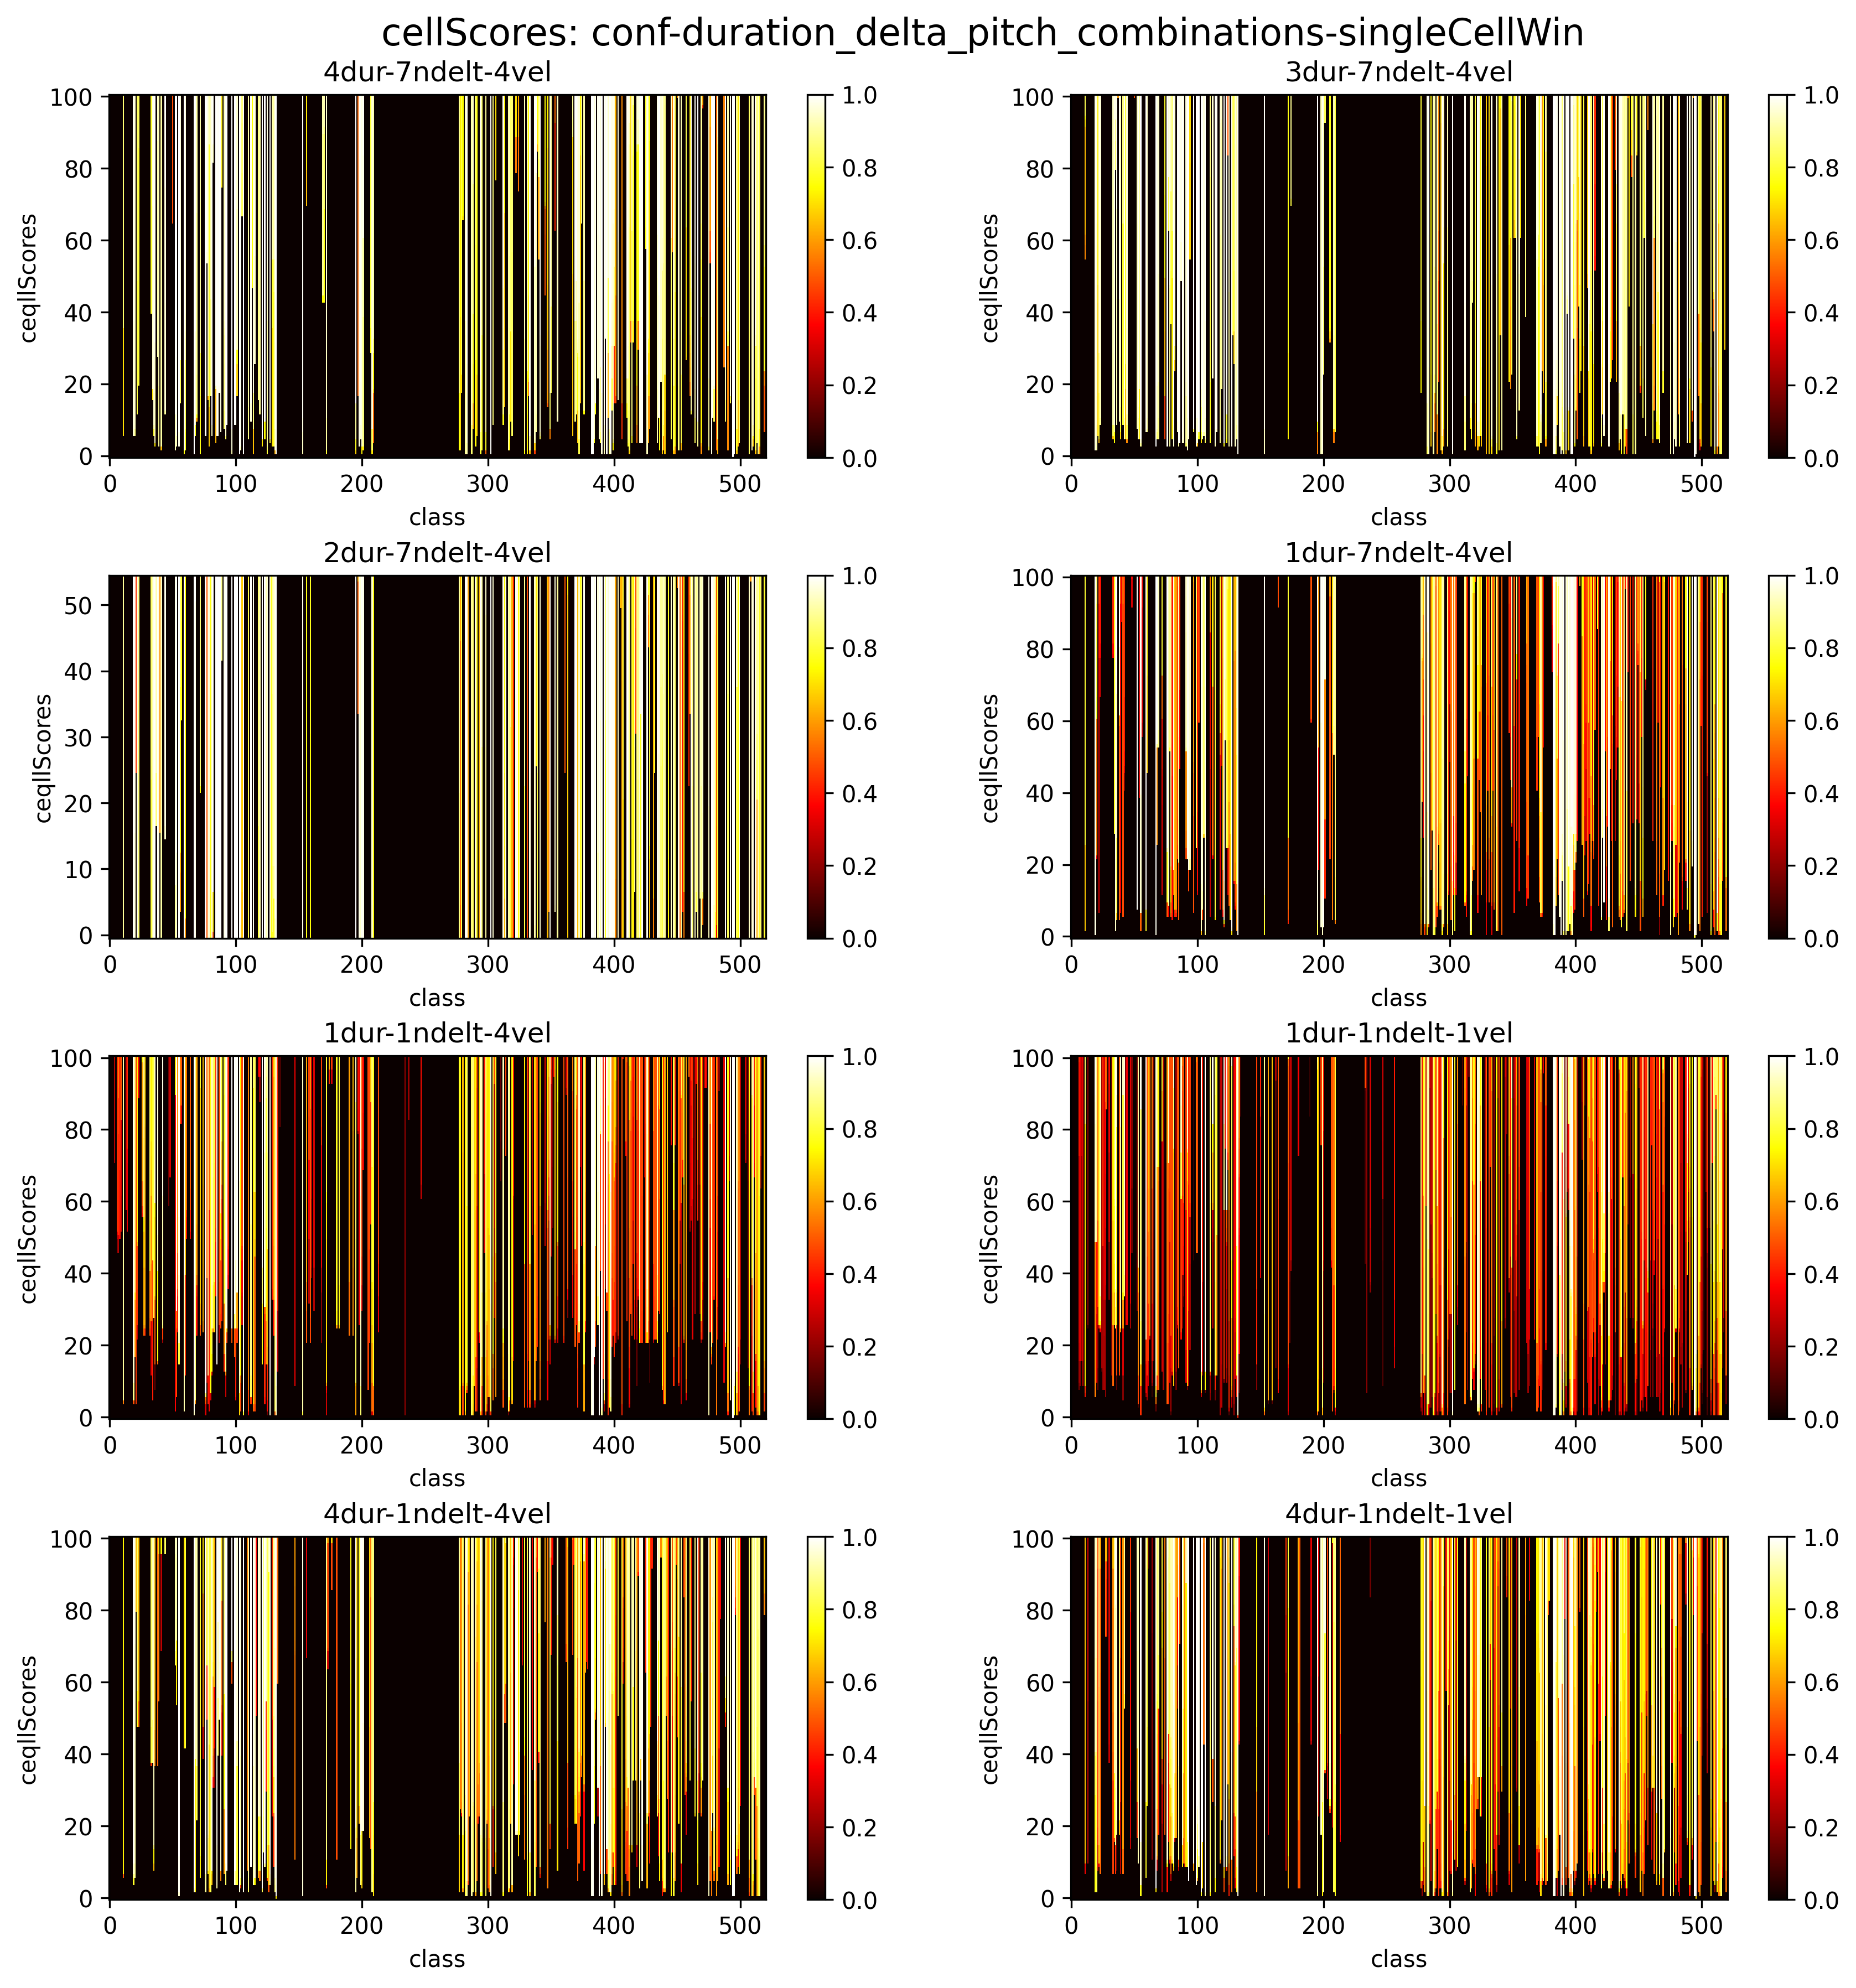

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def cellScoresPlotFunc(plotter, axesSubplot, x_values, cellScores, title):
  axesSubplot.set_title(title)
  img = axesSubplot.imshow(cellScores, cmap='hot', interpolation='nearest', aspect='auto')
  plotter.colorbar(img, ax=axesSubplot)
  axesSubplot.set_xlabel('class')
  axesSubplot.set_ylabel('ceqllScores')
  axesSubplot.invert_yaxis()

# plotter = plotUtil.get_plotter()
# plotter.gca().invert_yaxis()
    
plotUtil.render_graphs(cell_scores_arrays, x_multiplier, cellScoresPlotFunc, 12, 12, title, 300)


# # Get the cellScores 2D array from the JSON data at evoRuns[0].iterations[0].cellScores
# cellScores = np.array(data['evoRuns'][0]['iterations'][0]['cellScores']).astype(np.float) # https://www.geeksforgeeks.org/using-numpy-to-convert-array-elements-to-float-type/
# print(cellScores)
# classLabels = data['evoRuns'][0]['iterations'][0]['classLabels']

# # Plot a heatmap of the cellScores 2D array

# plt.imshow(cellScores, cmap='hot', interpolation='nearest')
# plt.gca().invert_yaxis()
# plt.show()

# # # Plot a heatmap of the cellScores 2D array with a colorbar, with the y axis inverted
# plt.imshow(cellScores, cmap='hot', interpolation='nearest', aspect='auto')
# plt.gca().invert_yaxis()
# plt.colorbar()
# plt.show()


# ### Adjusting the colorscale
# vmin = np.min(cellScores)
# vmax = np.max(cellScores)

# plt.imshow(cellScores, cmap='coolwarm', vmin=vmin, vmax=vmax, interpolation='nearest')
# plt.gca().invert_yaxis()
# plt.colorbar()
# plt.show()


# ### Adjusting the height
# vmin = np.min(cellScores)
# vmax = np.max(cellScores)

# # Calculate the extent of the heatmap
# #extent = [0, len(cellScores[0]), 0, len(cellScores)]

# # Create the heatmap with adjusted aspect ratio, multiply the y-axis values by a constant
# plt.imshow(cellScores, cmap='coolwarm', vmin=vmin, vmax=vmax,  interpolation='nearest')
# plt.gca().invert_yaxis()
# plt.colorbar()

# # Set the aspect ratio to 'auto'
# plt.gca().set_aspect('auto')

# # Set the x-axis tick positions and labels
# # plt.xticks(range(len(classLabels)), classLabels)
# # plt.xticks(range(len(classLabels)), classLabels, rotation='vertical')

# # Define the step value for x-axis label display
# step = 15  # Display every 2nd label, adjust as needed

# # Set the x-axis tick positions and labels
# plt.xticks(range(len(classLabels))[::step], classLabels[::step], rotation='vertical')


# # # Define the constant by which the y-values need to be multiplied
# # constant = x_multiplier
# # # Get the current y-axis tick positions and labels
# # yticks = plt.yticks()[0]
# # yticklabels = [ytick * constant for ytick in yticks]
# # # Set the scaled y-axis tick positions and labels
# # plt.yticks(yticks, yticklabels)

# # Define the constant by which the y-values need to be multiplied
# constant = x_multiplier

# # Get the current y-axis tick positions
# yticks = plt.yticks()[0]

# # Scale the y-values by the constant and format as integers
# yticklabels = [int(ytick * constant) for ytick in yticks]

# # Set the scaled y-axis tick positions and labels
# plt.yticks(yticks, yticklabels)

# # Set the y-axis limits without vertical padding
# plt.ylim(yticks[1], yticks[-2])

# # Set the y-axis label with vertical rotation
# plt.ylabel('Iteration', rotation=90)

# plt.show()



In [ ]:
import joypy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.datasets import load_iris

In [ ]:
# Create a data frame with the cellScores 2D array, where one column is the current entry number and the other colum is each entry in the cellScores (outer) 2D array

# concatenate the cellScores 2D array into a 1D array and convert each value with the float() function


# expanded_cellScores = np.concatenate(cellScores)
expanded_cellScores = [float(number) for sublist in cellScores for number in sublist]
# find the max value of the expanded_cellScores array
max_value = max(expanded_cellScores)
print(max_value)
cellScores_index_values = np.repeat(np.arange(len(cellScores)), len(cellScores[0]))

# print the first 500 values from the expanded_cellScores array
print(expanded_cellScores[:500])
# print the last 500 values from the expanded_cellScores array
#print(expanded_cellScores[-500:])


df = pd.DataFrame({'Iteration': cellScores_index_values, 'Score': expanded_cellScores})
df.set_index('Iteration', inplace=True)

# print(df)

In [ ]:
%matplotlib inline

labels=list(df.index.unique())
fig, axes = joypy.joyplot(df, by="Iteration", column="Score", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(6,5),
                          title="Scores across one evolution run",
                          colormap=cm.autumn_r, overlap=3)

In [ ]:
%matplotlib inline

fig, axes = joypy.joyplot(df,by="Iteration", column="Score", ylabels=False, xlabels=False, 
                          grid=False, fill=False, background='k', linecolor="w", linewidth=1,
                          legend=False, overlap=1.5, figsize=(6,5),kind="counts", bins=80)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    a.set_xlim([-8,8])     